# Introduction into handling geographical data

[John Snow](https://en.wikipedia.org/wiki/John_Snow) was an English physician, who was first to trace the source of a cholera outbreak in London's Soho district in 1854 using data visualization. In the following exercises, we are going to reconstruct the map of Snow with modern tools and explore some ideas of geographic data analysis.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Snow-cholera-map-1.jpg" width="400px"></img>

Though there is a whole [R library](https://vincentarelbundock.github.io/Rdatasets/doc/HistData/Snow.pumps.html) dedicated to this dataset, we would like R users to also build the solutions (e.g. Voronoi cells) from scratch.

Further reading:
* https://en.wikipedia.org/wiki/1854_Broad_Street_cholera_outbreak
* https://www1.udel.edu/johnmack/frec682/cholera/cholera2.html
* https://www.theguardian.com/news/datablog/interactive/2013/mar/15/cholera-map-john-snow-recreated

The shapefile that will be used in these exercises is located at http://donboyes.com/2011/10/14/john-snow-and-serendipity/.

## Exercise 1

*[Geopandas](http://geopandas.org/install.html)*

Download the zip file from the previous link that contains the geographical data of the different objects on John Snow's cholera map. Load the death and the pump dataset into a tabular format! Have a look at the dataset's structure!

*The format of the files is called [shapefile](https://en.wikipedia.org/wiki/Shapefile), which is a format that is easily readable by the most common GIS (Geographic Information System) softwares. Shapefiles consist of many files, some of which store the geographic information, some the coordinate system description, some the additional attributes of the geographical objects. [geopandas](http://geopandas.org/) is able to read shapefiles natively into its base class GeoDataFrame, which has a similar API to that of `pandas` `DataFrames`. This is convenient, because we can use all of our previous knowledge of `pandas`.*

*It is sometimes worth to have a look at a shapefile's content quickly. For Linux, [QGIS](https://www.qgis.org/en/site/about/index.html) is a powerful free GIS system, try it at home!*

In [93]:
import geopandas as gpd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from scipy.spatial import Voronoi, voronoi_plot_2d

import scipy.stats as st

import folium
from folium import plugins

import seaborn as sns



In [70]:
deaths_gcs = gpd.read_file('./shapes/deaths_gcs.shp')
pumps_gcs = gpd.read_file('./shapes/pumps_gcs.shp')


In [71]:
deaths_gcs.head()

,OBJECTID,X,Y,geometry
0,1,13.588010,11.095600,POINT (-0.1358510124179086 51.51294954729676)
1,2,9.878124,12.559180,POINT (-0.138770102002734 51.51371230751689)
2,3,14.653980,10.180440,POINT (-0.1350160883265595 51.51248811121285)
3,4,15.220570,9.993003,POINT (-0.1345699931742053 51.51238929251129)
4,5,13.162650,12.963190,POINT (-0.1361725598760318 51.51386954122671)


In [72]:
pumps_gcs.head()

,OBJECTID,X,Y,geometry
0,1,8.651201,17.891600,POINT (-0.1396208554870189 51.51630294134797)
1,2,10.984780,18.517851,POINT (-0.1377342856072615 51.51658205873352)
2,3,13.378190,17.394541,POINT (-0.1358459998004841 51.51601929553199)
3,4,14.879830,17.809919,POINT (-0.1346316790272766 51.5162048651341)
4,5,8.694768,14.905470,POINT (-0.1396648470900002 51.51486655853756)


## Exercise 2

Extract the latitudes and the longitudes for each row in both datasets as additional columns.

*In a `GeoDataFrame`, the `geometry` column contains geometry objects from the [`shapely`](https://toblerity.org/shapely/index.html) library. These objects have coordinate attributes, that is where latitude and longitude values are stored.*

In [73]:
#The way to extract latitudes and longitudes
# deaths_gcs['geometry'].centroid.x
# deaths_gcs['geometry'].centroid.y

In [74]:
#Cheking the shapes
#deaths_gcs['geometry'].shape, deaths_gcs['geometry'].centroid.x.shape


In [75]:
# For deaths_gcs adding the latitudes and longitudes

deaths_gcs.insert(loc = 4, column = 'longitudes', value = deaths_gcs['geometry'].centroid.x)
deaths_gcs.insert(loc = 5, column = 'latitudes', value = deaths_gcs['geometry'].centroid.y)


In [76]:
# For pumps adding the latitudes and longitudes

pumps_gcs.insert(loc = 4, column = 'longitudes', value = pumps_gcs['geometry'].centroid.x)
pumps_gcs.insert(loc = 5, column = 'latitudes', value = pumps_gcs['geometry'].centroid.y)

In [77]:
#Check the result with added columns

In [78]:
pumps_gcs.head()

,OBJECTID,X,Y,geometry,longitudes,latitudes
0,1,8.651201,17.891600,POINT (-0.1396208554870189 51.51630294134797),-0.139621,51.516303
1,2,10.984780,18.517851,POINT (-0.1377342856072615 51.51658205873352),-0.137734,51.516582
2,3,13.378190,17.394541,POINT (-0.1358459998004841 51.51601929553199),-0.135846,51.516019
3,4,14.879830,17.809919,POINT (-0.1346316790272766 51.5162048651341),-0.134632,51.516205
4,5,8.694768,14.905470,POINT (-0.1396648470900002 51.51486655853756),-0.139665,51.514867


In [79]:
deaths_gcs.head()

,OBJECTID,X,Y,geometry,longitudes,latitudes
0,1,13.588010,11.095600,POINT (-0.1358510124179086 51.51294954729676),-0.135851,51.512950
1,2,9.878124,12.559180,POINT (-0.138770102002734 51.51371230751689),-0.138770,51.513712
2,3,14.653980,10.180440,POINT (-0.1350160883265595 51.51248811121285),-0.135016,51.512488
3,4,15.220570,9.993003,POINT (-0.1345699931742053 51.51238929251129),-0.134570,51.512389
4,5,13.162650,12.963190,POINT (-0.1361725598760318 51.51386954122671),-0.136173,51.513870


## Exercise 3

How many deaths were within a given radius around the wells? Test for a series of radiuses. Project your points into a coordinate system where you can measure real distances (using e.g. `pyproj`), then create a meaningul visualization of the data.

*It is crucial to use the appropriate coordinate system for your purposes. For this exercise, the spherical coordinate system of lon,lat values is not convenient, since we cannot calculate distances in meters as easily as we would in a Cartesian coordinate system. Because of the Earth's shape, most projections distort distances at certain latitudes and longitudes.*

*In GIS, different coordinate systems are called CRS (Coordinate Reference System), and have patented codes that define the origin, the projection etc. The usual lon,lat pairs are called the WGS84 system. A good choice for a Cartesian system is for example the Pseudo-Mercator projection. The `pyproj` library is especially lightweight to use in Python.*

*[Pyproj](https://kite.com/python/docs/pyproj)*

In [80]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure


In [81]:
deaths_gcs.crs, pumps_gcs.crs

({'init': 'epsg:4326'}, {'init': 'epsg:4326'})

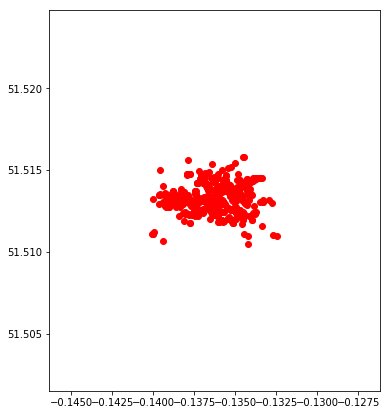

In [82]:
# f = figure(figsize = (10,7))
# plt.xlabel('latitudes')
# plt.ylabel('longitudes')

deaths_gcs.plot(color = 'red', figsize = (10,7))

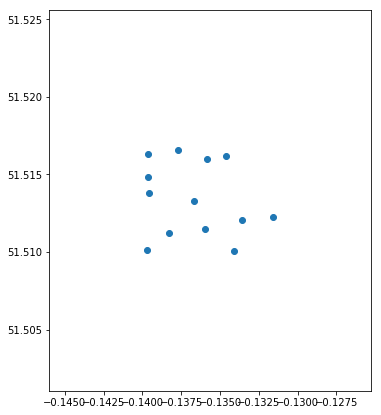

In [83]:
# f = figure(figsize = (10,7))
# plt.xlabel('latitudes')
# plt.ylabel('longitudes')

pumps_gcs.plot(figsize = (10,7))

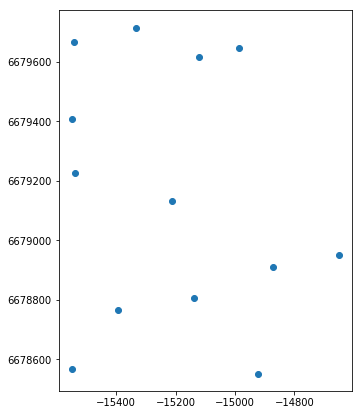

In [84]:
#Converting into meters
pumps_gcs.to_crs({'init': 'epsg:3395'},inplace=True)
pumps_gcs.plot(figsize = (10,7))


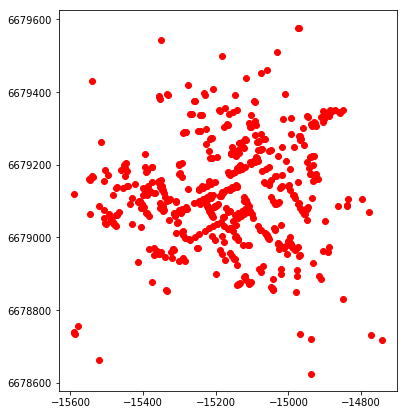

In [85]:
#Converting into meters
deaths_gcs.to_crs({'init': 'epsg:3395'},inplace=True)
deaths_gcs.plot(color = 'red', figsize = (10,7))

In [86]:
x1 = deaths_gcs['geometry'].centroid.x
y1 = deaths_gcs['geometry'].centroid.y

x2 = pumps_gcs['geometry'].centroid.x
y2 = pumps_gcs['geometry'].centroid.y

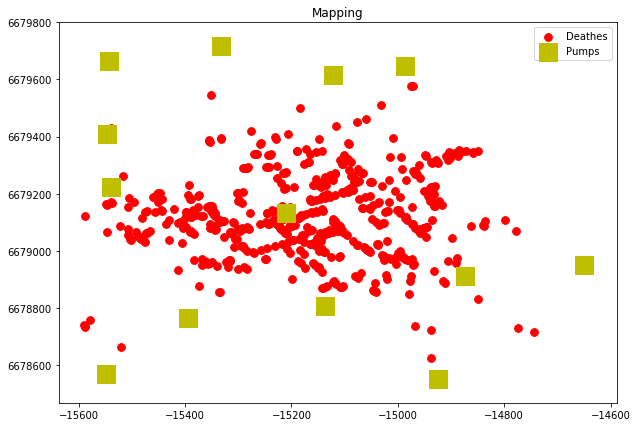

In [87]:
f = figure(figsize = (10,7)) 
plt.scatter(x1,y1, label = 'Deathes', s=60, c='r', marker='o')
plt.scatter(x2,y2, label = 'Pumps', s=300, c='y', marker='s')

plt.title('Mapping')
plt.legend()
plt.show()

## Exercise 4

Put both the deaths and the pumps on a zoomable map that has a base layer from a tile server different from that of the default settings of your chosen method. Set the appropriate map center and zoom level. Use different markers for the deaths and the pumps datasets.

*Try folium in Python, or Leaflet in R or JS. Display the map here in the notebook.*

In [88]:
deaths_gcs.head()

,OBJECTID,X,Y,geometry,longitudes,latitudes
0,1,13.588010,11.095600,POINT (-15122.86552611227 6679067.719538039),-0.135851,51.512950
1,2,9.878124,12.559180,POINT (-15447.81709227498 6679203.802773925),-0.138770,51.513712
2,3,14.653980,10.180440,POINT (-15029.92220141225 6678985.396331269),-0.135016,51.512488
3,4,15.220570,9.993003,POINT (-14980.26311620684 6678967.766539409),-0.134570,51.512389
4,5,13.162650,12.963190,POINT (-15158.66002541642 6679231.854956841),-0.136173,51.513870


In [89]:
deaths_gcs.crs, pumps_gcs.crs

({'init': 'epsg:3395'}, {'init': 'epsg:3395'})

In [90]:
#Checking up the map
# import folium
# from folium import plugins

m = folium.Map(
    location=[deaths_gcs['latitudes'][0], deaths_gcs['longitudes'][0]],
    zoom_start=12,
    tiles='Stamen Terrain'
)

tooltip = 'Click me!'

                

folium.Marker([deaths_gcs['latitudes'][1], deaths_gcs['longitudes'][1]], popup='<b>Here you are</b>', tooltip=tooltip).add_to(m)                

m


In [91]:
m = folium.Map(
    location=[deaths_gcs['latitudes'][0], deaths_gcs['longitudes'][0]],
    zoom_start=15,
    tiles='Stamen Terrain'
)

tooltip_pump = 'Pump'
tooltip_death = 'Death'
color_pump = 'red'
color_death = 'black'


#Pumps markers

for i in range(len(pumps_gcs['latitudes'])):
    for j in range(len(pumps_gcs['longitudes'])):
        folium.Marker([pumps_gcs.iloc[i]['latitudes'], pumps_gcs.iloc[j]['longitudes']], 
                      popup='<b>Pumps</b>', tooltip=tooltip_pump,icon=folium.Icon(color=color_pump)).add_to(m) 
        

#Radius around pumps

folium.CircleMarker([pumps_gcs['latitudes'][0], pumps_gcs['longitudes'][0]],
                radius=50,
                color='#3186cc',
                fill_color='#3186cc',
               ).add_to(m)

folium.CircleMarker([pumps_gcs['latitudes'][5], pumps_gcs['longitudes'][5]],
                radius=50,
                color='#3186cc',
                fill_color='#3186cc',
               ).add_to(m)

folium.CircleMarker([pumps_gcs['latitudes'][10], pumps_gcs['longitudes'][10]],
                radius=80,
                color='##3186cc',
                fill_color='green',
               ).add_to(m)

folium.CircleMarker([pumps_gcs['latitudes'][10], pumps_gcs['longitudes'][10]],
                radius=150,
                color='##3186cc',
                fill_color='black',
               ).add_to(m)



for i in range(len(deaths_gcs['latitudes'][:20])):
    for j in range(len(deaths_gcs['longitudes'][:20])):
        folium.Marker([deaths_gcs.iloc[i]['latitudes'], deaths_gcs.iloc[j]['longitudes']], 
                      popup='<b>Death</b>', tooltip=tooltip_death,icon=folium.Icon(color=color_death)).add_to(m) 

# folium.Marker([deaths_gcs['latitudes'][0], deaths_gcs['longitudes'][0]], popup='<b>Death</b>', tooltip=tooltip_death).add_to(m)
# folium.Marker([deaths_gcs['latitudes'][1], deaths_gcs['longitudes'][1]], popup='<b>Death</b>', tooltip=tooltip_death).add_to(m)

#Deathes markers for all the observations

# for i in range(len(deaths_gcs['latitudes'])):
#     for j in range(len(deaths_gcs['longitudes'])):
#         folium.Marker([deaths_gcs.iloc[i]['latitudes'], deaths_gcs.iloc[j]['longitudes']], 
#                       popup='<b>Death</b>', tooltip=tooltip_death).add_to(m) 
        
#Deathes markers for 50 observations       

# for i in range(0,50):
#     for j in range(0,50):
#         folium.Marker([deaths_gcs['latitudes'][i], deaths_gcs['longitudes'][j]], 
#                       popup='<b>Death</b>', tooltip=tooltip_death).add_to(m) 

                      
m

In [92]:
# for i in range(len(pumps_gcs['latitudes'])):
#     for j in range(len(pumps_gcs['longitudes'])):
#                    print(pumps_gcs['latitudes'][i], pumps_gcs['longitudes'][j])


##### Calculating the distances between point A and point B)

#Point(0,0).distance(Point(1,1))

## Exercise 5

Calculate the Voronoi cells for the pumps, and count the number of deaths falling into each of the cells.  Create a bar chart of the number of deaths in each cell. Pinpoint the possible source of the infection.

*Store the Voronoi cells in a GeoDataFrame, then you can easily do a spatial join (e.g. testing whether a polygon in the Voronoi dataframe contains a point from the death dataframe).*

In [25]:
# from scipy.spatial import Voronoi, voronoi_plot_2d
# import numpy as np
#pumps_coors = [0]

#pumps_gcs['geometry']        
        
####Problems with simple fucntion!!!!!!


# def extr_pumps_coors(x):
#     pumps_coors = []
#     for i in range(len(x)):
#         pumps_coors = pumps_coors.append(list(x[i].coords))
#     return pumps_coors        

#Down

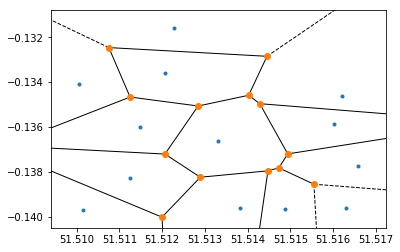

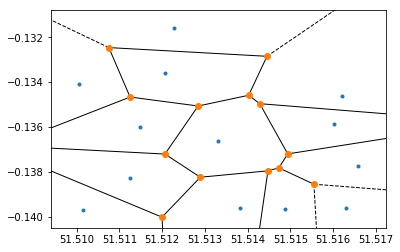

In [26]:
points = np.array([[pumps_gcs['latitudes'][0],pumps_gcs['longitudes'][0]],
                   [pumps_gcs['latitudes'][1],pumps_gcs['longitudes'][1]],
                   [pumps_gcs['latitudes'][2],pumps_gcs['longitudes'][2]],
                   [pumps_gcs['latitudes'][3],pumps_gcs['longitudes'][3]],
                   [pumps_gcs['latitudes'][4],pumps_gcs['longitudes'][4]],
                   [pumps_gcs['latitudes'][5],pumps_gcs['longitudes'][5]],
                   [pumps_gcs['latitudes'][6],pumps_gcs['longitudes'][6]],
                   [pumps_gcs['latitudes'][7],pumps_gcs['longitudes'][7]],
                   [pumps_gcs['latitudes'][8],pumps_gcs['longitudes'][8]],
                   [pumps_gcs['latitudes'][9],pumps_gcs['longitudes'][9]],
                   [pumps_gcs['latitudes'][10],pumps_gcs['longitudes'][10]],
                   [pumps_gcs['latitudes'][11],pumps_gcs['longitudes'][11]],
                   [pumps_gcs['latitudes'][12],pumps_gcs['longitudes'][12]]
                  ])

vor = Voronoi(points, incremental=True)
voronoi_plot_2d(vor)

#Down

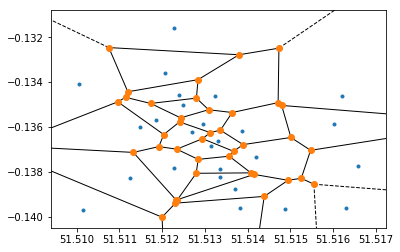

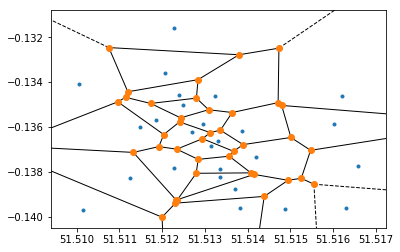

In [27]:
points = np.array([[pumps_gcs['latitudes'][0],pumps_gcs['longitudes'][0]],
                   [pumps_gcs['latitudes'][1],pumps_gcs['longitudes'][1]],
                   [pumps_gcs['latitudes'][2],pumps_gcs['longitudes'][2]],
                   [pumps_gcs['latitudes'][3],pumps_gcs['longitudes'][3]],
                   [pumps_gcs['latitudes'][4],pumps_gcs['longitudes'][4]],
                   [pumps_gcs['latitudes'][5],pumps_gcs['longitudes'][5]],
                   [pumps_gcs['latitudes'][6],pumps_gcs['longitudes'][6]],
                   [pumps_gcs['latitudes'][7],pumps_gcs['longitudes'][7]],
                   [pumps_gcs['latitudes'][8],pumps_gcs['longitudes'][8]],
                   [pumps_gcs['latitudes'][9],pumps_gcs['longitudes'][9]],
                   [pumps_gcs['latitudes'][10],pumps_gcs['longitudes'][10]],
                   [pumps_gcs['latitudes'][11],pumps_gcs['longitudes'][11]],
                   [pumps_gcs['latitudes'][12],pumps_gcs['longitudes'][12]]
                  ])

vor = Voronoi(points, incremental=True)

points_death = np.array([[deaths_gcs['latitudes'][0],deaths_gcs['longitudes'][0]],
                   [deaths_gcs['latitudes'][1],deaths_gcs['longitudes'][1]],
                   [deaths_gcs['latitudes'][2],deaths_gcs['longitudes'][2]],
                   [deaths_gcs['latitudes'][3],deaths_gcs['longitudes'][3]],
                   [deaths_gcs['latitudes'][4],deaths_gcs['longitudes'][4]],
                   [deaths_gcs['latitudes'][5],deaths_gcs['longitudes'][5]],
                   [deaths_gcs['latitudes'][6],deaths_gcs['longitudes'][6]],
                   [deaths_gcs['latitudes'][7],deaths_gcs['longitudes'][7]],
                   [deaths_gcs['latitudes'][8],deaths_gcs['longitudes'][8]],
                   [deaths_gcs['latitudes'][9],deaths_gcs['longitudes'][9]],
                   [deaths_gcs['latitudes'][10],deaths_gcs['longitudes'][10]],
                   [deaths_gcs['latitudes'][11],deaths_gcs['longitudes'][11]],
                   [deaths_gcs['latitudes'][12],deaths_gcs['longitudes'][12]]
                  ])

vor.add_points(points_death, restart=False)

voronoi_plot_2d(vor)

#Down

**Full picture**

/opt/conda/lib/python3.6/site-packages/scipy/spatial/_plotutils.py:20: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()


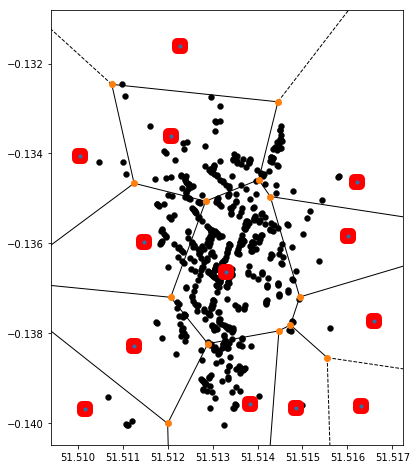

In [94]:
#import scipy

figure_voronoi = plt.figure()
figure_voronoi.set_size_inches(8,8)
ax = figure_voronoi.add_subplot('111', aspect='equal')
vor = scipy.spatial.Voronoi(points)
voronoi_figure = scipy.spatial.voronoi_plot_2d(vor, ax = ax)
ax.scatter(x = deaths_gcs['latitudes'], y = deaths_gcs['longitudes'], c = 'black', linewidths=0.3) #Deathes
ax.scatter(x = pumps_gcs['latitudes'], y = pumps_gcs['longitudes'], c = 'red', marker='s', linewidths=10) #Pumps



/opt/conda/lib/python3.6/site-packages/scipy/spatial/_plotutils.py:20: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()


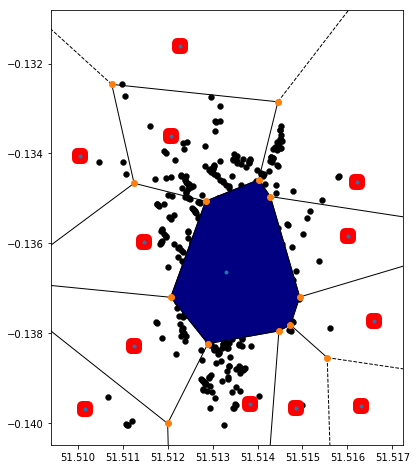

In [99]:
#print (vor.regions)
#print (vor.vertices)
#print (vor.ridge_points)
#print (vor.ridge_vertices)
#print (vor.points)
#print (vor.point_region)

#The place where we have the biggest number of deathes

figure_voronoi = plt.figure()
figure_voronoi.set_size_inches(8,8)
ax = figure_voronoi.add_subplot('111', aspect='equal')
vor = scipy.spatial.Voronoi(points)
voronoi_figure = scipy.spatial.voronoi_plot_2d(vor, ax = ax)
ax.scatter(x = deaths_gcs['latitudes'], y = deaths_gcs['longitudes'], c = 'black', linewidths=0.3) #Deathes
ax.scatter(x = pumps_gcs['latitudes'], y = pumps_gcs['longitudes'], c = 'red', marker='s', linewidths=10) #Pumps

point_index = np.argmin(np.sum((points - points_death)**2, axis=1))
ridges = np.where(vor.ridge_points == point_index)[0]
vertex_set = set(np.array(vor.ridge_vertices)[ridges, :].ravel())
region = [x for x in vor.regions if set(x) == vertex_set][0]

polygon = vor.vertices[region]
plt.fill(*zip(*polygon), color='navy')  
plt.show()

In [100]:
polygon

array([[51.51447612, -0.13795056],
       [51.51289484, -0.13823453],
       [51.51206691, -0.13720284],
       [51.51284403, -0.13506389],
       [51.5140252 , -0.13458577],
       [51.514284  , -0.13495948],
       [51.51493927, -0.13719588],
       [51.5147322 , -0.13781797]])

In [105]:
#sns.barplot(data = deaths_gcs['geometry'][:40])

## Exercise 6

Create a death density map using 2D Kernel Density Estimation. Display the density and its contours on the map along with the pumps. What is the density value at each of the pumps? Pinpoint the possible source of the infection.

*Use the projected Cartesian coordinate system for this exercise.* 

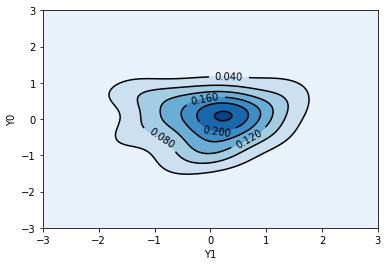

In [106]:
#That's just an example
# import numpy as np
# import matplotlib.pyplot as pl
# import scipy.stats as st

data = np.random.multivariate_normal((0, 0), [[0.8, 0.05], [0.05, 0.7]], 100)
x = data[:, 0]
y = data[:, 1]
xmin, xmax = -3, 3
ymin, ymax = -3, 3

# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = pl.figure()
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# Contourf plot
cfset = ax.contourf(xx, yy, f, cmap='Blues')
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
# Contour plot
cset = ax.contour(xx, yy, f, colors='k')
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('Y1')
ax.set_ylabel('Y0')

pl.show()

**[SeaBorn Kernel Density](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)**

/opt/conda/lib/python3.6/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


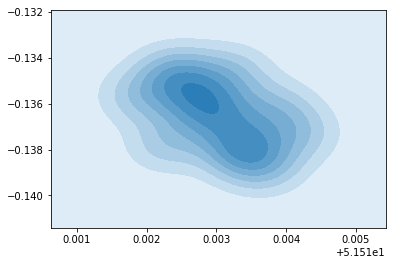

In [107]:
# import seaborn as sns
sns.kdeplot(data = points_death, shade=True);

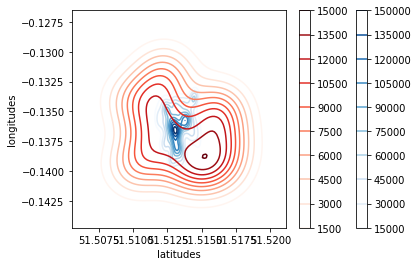

In [108]:
# x = deaths_gcs['longitudes'].values.T
# y = deaths_gcs['latitudes'].values.T

sns.kdeplot(deaths_gcs['latitudes'], deaths_gcs['longitudes'],  cbar=True, cmap="Blues");
sns.kdeplot(pumps_gcs['latitudes'], pumps_gcs['longitudes'], cbar=True, cmap="Reds");

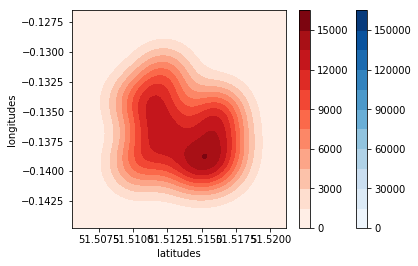

In [109]:
sns.kdeplot(deaths_gcs['latitudes'], deaths_gcs['longitudes'], shade=True,shade_lowest=True,  cbar=True, cmap="Blues");
sns.kdeplot(pumps_gcs['latitudes'], pumps_gcs['longitudes'], shade=True, shade_lowest=True ,cbar=True, cmap="Reds");

## Exercise 7

Create a GeoJSON object from the Voronoi cells, put the cells on the previously used map, colored according to the number of deaths (like on a heatmap). Display the results in the notebook.

*[GeoJSON](http://geojson.org/) is a common format that is used in web applications. It is basically a simple key-value dictionary with a predefined structure for storing geographic information. Once loaded into Python, it behaves like a normal Python dictionary, thus creating or modifying it is quite straightforward. When reading or writing to a file, the `json` module is handy. The advice is to write a function that converts a list of coordinates from a polygon into a GeoJSON feature, then add it to your GeoJSON structure.*

**[Usefull link](https://turfjs.org/docs/)**

## Exercise 8

Download the street network of the area of the deaths from OpenStreetMap using its [map API](https://wiki.openstreetmap.org/wiki/API_v0.6#Retrieving_map_data_by_bounding_box:_GET_.2Fapi.2F0.6.2Fmap). Use street segments given back by the API as edges of a street graph. Develop a method based on the cholera dataset to classify these edges into three categories:
* existed at the time of John Snow
* did not exist at the time of John Snow
* cannot decide

*You'll get the id of each node and way that falls within a bounding box with the GET method of the map API. Use the ids to retrieve the shapes with the help of the ways API.*

*The results will be in XML format. Find a good [XML parser](https://docs.python.org/2/library/xml.etree.elementtree.html#module-xml.etree.ElementTree) to navigate the structures.*

In [ ]:
# import requests

# request = requests.request(url = 'http://http:/api/0.6/map?bbox=min_lon,min_lat,max_lon,max_lat (W,S,E,N)')

# print(request.json())

## Exercise 9

Plot the streets on the map along with the pumps and the deaths colored by the results of the classification.